### Keras DNN으로 집값 예측하기

1. 패키지 수입 및 파라미터 설정

In [1]:
# 수입
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from time import time

from keras.models import Sequential
from keras.layers import Dense
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [2]:
# 파라미터
MY_HIDDEN = 1000
MY_EPOCH = 500

2. 데이터 처리

In [3]:
# 데이터 읽기
raw = pd.read_csv('/content/drive/MyDrive/data/housing.csv')

# 데이터 샘플 10개 출력
print(raw.head(10))

# 데이터 통계 출력
print(raw.describe())

      CRIM    ZN  INDUS  CHAS    NOX  ...  RAD  TAX  PTRATIO  LSTAT  MEDV
0  0.00632  18.0   2.31     0  0.538  ...    1  296     15.3   4.98  24.0
1  0.02731   0.0   7.07     0  0.469  ...    2  242     17.8   9.14  21.6
2  0.02729   0.0   7.07     0  0.469  ...    2  242     17.8   4.03  34.7
3  0.03237   0.0   2.18     0  0.458  ...    3  222     18.7   2.94  33.4
4  0.06905   0.0   2.18     0  0.458  ...    3  222     18.7   5.33  36.2
5  0.02985   0.0   2.18     0  0.458  ...    3  222     18.7   5.21  28.7
6  0.08829  12.5   7.87     0  0.524  ...    5  311     15.2  12.43  22.9
7  0.14455  12.5   7.87     0  0.524  ...    5  311     15.2  19.15  27.1
8  0.21124  12.5   7.87     0  0.524  ...    5  311     15.2  29.93  16.5
9  0.17004  12.5   7.87     0  0.524  ...    5  311     15.2  17.10  18.9

[10 rows x 13 columns]
             CRIM          ZN       INDUS  ...     PTRATIO       LSTAT        MEDV
count  506.000000  506.000000  506.000000  ...  506.000000  506.000000  506.000

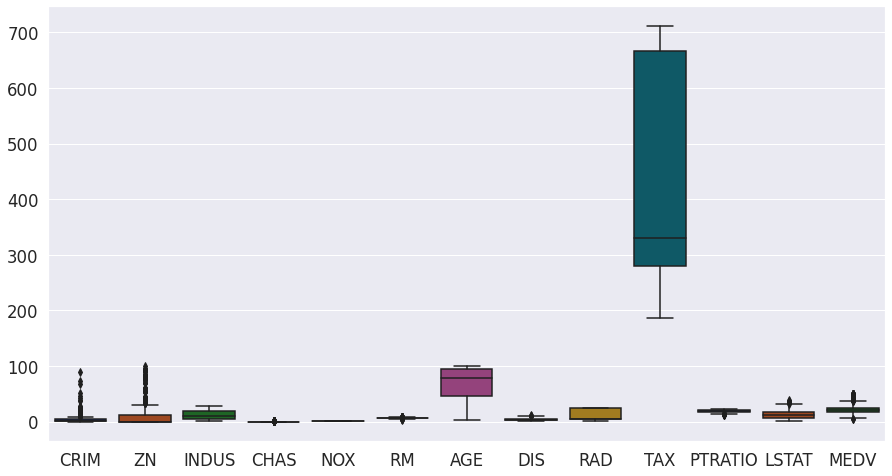

In [4]:
plt.figure(figsize=(15, 8))
sns.set(font_scale=1.5)
sns.boxplot(data=raw, palette='dark')


In [5]:
# z-점수 정규화
scaler = StandardScaler()
z_data = scaler.fit_transform(raw)


# 데이터 형식 출력
print(type(raw))
print(type(z_data))

# numpy를 pandas로 재전환
z_data = pd.DataFrame(z_data)
print(type(z_data))

# z-점수 정규화 된 데이터 샘플 출력
print(z_data.head(10))
print(z_data.describe())

<class 'pandas.core.frame.DataFrame'>
<class 'numpy.ndarray'>
<class 'pandas.core.frame.DataFrame'>
         0         1         2   ...        10        11        12
0 -0.419782  0.284830 -1.287909  ... -1.459000 -1.075562  0.159686
1 -0.417339 -0.487722 -0.593381  ... -0.303094 -0.492439 -0.101524
2 -0.417342 -0.487722 -0.593381  ... -0.303094 -1.208727  1.324247
3 -0.416750 -0.487722 -1.306878  ...  0.113032 -1.361517  1.182758
4 -0.412482 -0.487722 -1.306878  ...  0.113032 -1.026501  1.487503
5 -0.417044 -0.487722 -1.306878  ...  0.113032 -1.043322  0.671222
6 -0.410243  0.048772 -0.476654  ... -1.505237 -0.031268  0.039964
7 -0.403696  0.048772 -0.476654  ... -1.505237  0.910700  0.497082
8 -0.395935  0.048772 -0.476654  ... -1.505237  2.421774 -0.656595
9 -0.400729  0.048772 -0.476654  ... -1.505237  0.623344 -0.395385

[10 rows x 13 columns]
                 0             1   ...            11            12
count  5.060000e+02  5.060000e+02  ...  5.060000e+02  5.060000e+02
mean 

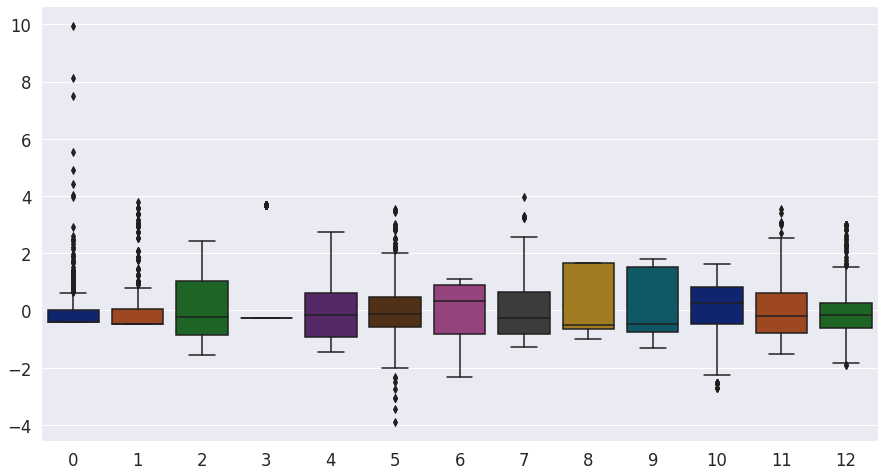

In [6]:
plt.figure(figsize=(15, 8))
sns.set(font_scale=1.5)
sns.boxplot(data=z_data, palette='dark')

In [7]:
#데이터 모양 출력
print('분리 전:', z_data.shape)

# 데이터를 입력과 출력으로 분리
X_data = z_data.drop(12, axis = 1)
Y_data = z_data[12]

# 데이터 모양 출력
print('분리 후 : ') 
print(X_data.shape)
print(Y_data.shape)

분리 전: (506, 13)
분리 후 : 
(506, 12)
(506,)


In [8]:
# 데이터 4분할
X_train, X_test, Y_train, Y_test = train_test_split(X_data,
                                                    Y_data,
                                                    train_size = 0.7)

# 최종 데이터 모델 출력
print('학습용 입력 데이터 모양', X_train.shape)
print('학습용 출력 데이터 모양', Y_train.shape)
print('평가용 입력 데이터 모양', X_test.shape)
print('평가용 출력 데이터 모양', Y_test.shape)

학습용 입력 데이터 모양 (354, 12)
학습용 출력 데이터 모양 (354,)
평가용 입력 데이터 모양 (152, 12)
평가용 출력 데이터 모양 (152,)


3. 인공신경망 구현

In [9]:
model = Sequential()

input = X_train.shape[1]

# 입력층과 은닉층 1 추가
model.add(Dense(units = MY_HIDDEN,
                input_dim = input, #입력층
                activation = 'relu'))

# 은닉층 2 추가
model.add(Dense(units = MY_HIDDEN,
                activation = 'relu'))



# 출력층 추가
model.add(Dense(units = 1))

print('DNN 요약')
model.summary()

DNN 요약
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1000)              13000     
_________________________________________________________________
dense_1 (Dense)              (None, 1000)              1001000   
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 1001      
Total params: 1,015,001
Trainable params: 1,015,001
Non-trainable params: 0
_________________________________________________________________


4. 인공 신경망 학습

In [10]:
# 학습 환경 설정
model.compile(optimizer = 'Adagrad',
              loss = 'mse')

print('학습 시작')
begin = time()

model.fit(x=X_train,
          y=Y_train,
          epochs = MY_EPOCH,
          #batch_size = MY_BATCH,
          verbose=0)

end = time()
print('총 학습 시간 : {:.2f}초'.format(end - begin))

학습 시작
총 학습 시간 : 13.88초


5. 인공 신경망 평가

In [11]:
# 신경망 평가
loss= model.evaluate(x = X_test,
                     y = Y_test,
                     verbose = 0)

print('최종 손실값 : {:.2f}'.format(loss))
print('최종 손실값 : ',loss)

최종 손실값 : 0.09
최종 손실값 :  0.09226563572883606


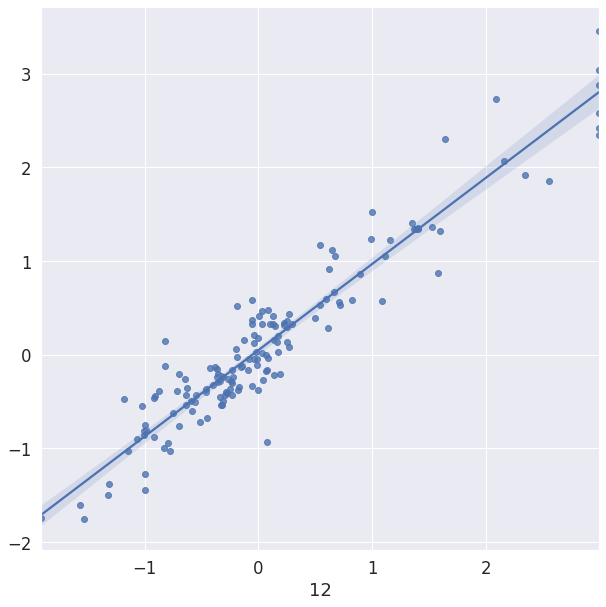

In [12]:
# DNN으로 예측
pred = model.predict(x = X_test)
plt.figure(figsize = (10, 10))

sns.regplot(x = Y_test, y = pred)